In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.DataFrame({'Area':[2600,3000,3200,3600,4000],
                 'Price':[550000,565000,610000,680000,725000]})
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
X=df[['Area']].values
y=df['Price']

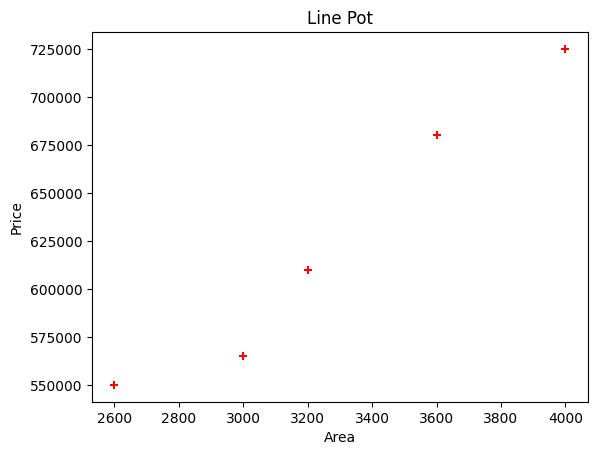

In [4]:
plt.scatter(X,y,color='r',marker='+')
plt.title("Line Pot")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [5]:
lm=LinearRegression()
lm.fit(X,y)
lm.predict([[3300]])

array([628715.75342466])

In [6]:
X=df[['Area']].values
y=df['Price']
lm=LinearRegression()
lm.fit(X,y)
lm.predict([[5000]])

array([859554.79452055])

In [7]:
lm.score(X,y)

0.9584301138199486

In [8]:
lm.coef_

array([135.78767123])

In [9]:
lm.intercept_

180616.43835616432

In [10]:
#y=mx+b where m is coef and b is intercept
135.78767123*5000+180616.43835616432

859554.7945061643

Text(0, 0.5, 'price')

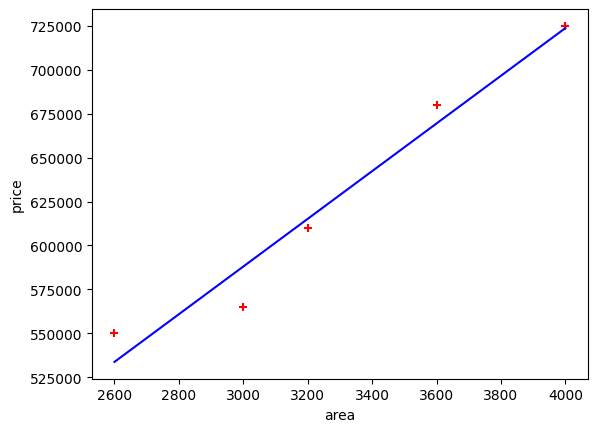

In [11]:
plt.scatter(X,y,color='r',marker='+')
plt.plot(X,lm.predict(X),color='b')
plt.xlabel('area')
plt.ylabel('price')

In [12]:
df1=pd.DataFrame({'Area':[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]}).values
df1

array([[1000],
       [1500],
       [2300],
       [3540],
       [4120],
       [4560],
       [5490],
       [3460],
       [4750],
       [2300],
       [9000],
       [8600],
       [7100]], dtype=int64)

In [13]:
pre=lm.predict(df1)

In [14]:
df1=pd.DataFrame(df1)
df1.to_csv("House Pediction.csv",index=False)

In [ ]:
#to predict the canada per_capita_income
df2=pd.read_csv('canada_per_capita_income.csv')
df2.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
X=df2[['year']].values
y=df2['per capita income (US$)']
lm.fit(X,y)
lm.predict([[2000]])

array([24719.39258996])

In [17]:
lm.score(X,y)

0.890916917957032

Text(0, 0.5, 'income')

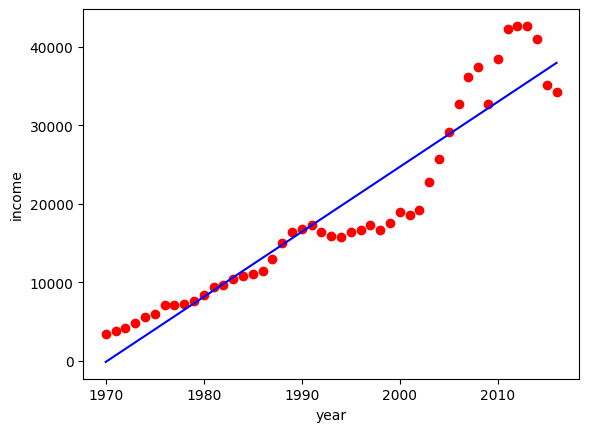

In [18]:
plt.scatter(X,y,color='r')
plt.plot(df2.year,lm.predict(df2[['year']]),color='b')
plt.xlabel('year')
plt.ylabel('income')

In [19]:
df3=pd.read_excel("C:/Users/MURUGAVEL V/Jupyter Notebook/MachineLearning/Datasets/House_Prediction1.xlsx")
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [20]:
import math
median_bedrooms=math.floor(df3.bedrooms.median())
df3.bedrooms=df3.bedrooms.fillna(median_bedrooms)
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [21]:
X=df3[['area','bedrooms','age']].values
y=df3['price']
lm.fit(X,y)
print("The price of the house for the following features \n 1. Area: 3000 \n 2. Bedrooms: 3 \n 3. Age: 40")
lm.predict([[3000,3,40]])

The price of the house for the following features 
 1. Area: 3000 
 2. Bedrooms: 3 
 3. Age: 40


array([444400.])

In [ ]:
area=eval(input("Enter the area  of the house:"))
bed_rooms=eval(input("Enter the no. of the bedrooms:"))
age=eval(input("Enter the age of the house:"))
print("The price of the house is:",lm.predict([[area,bed_rooms,age]]))

In [ ]:
# to save the model using pickle
import pickle
with open('Model_pickle','wb') as f:
    pickle.dump(lm,f)

In [ ]:
with open ('Model_pickle','rb') as f:
    mp= pickle.load(f)

In [ ]:
mp.predict([[25000,5,8]])

In [ ]:
import joblib
joblib.dump(lm,'model_joblib')

In [ ]:
mj=joblib.load('model_joblib')

In [ ]:
mj.predict([[25000,5,8]])

In [ ]:
df4=pd.read_csv("Downloads/homeprices.csv")
df4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df4.town=le.fit_transform(df4.town)
df4

In [ ]:
X=df4[['town','area']].values
y=df4['price']
lm.fit(X,y)
lm.predict([[2,3600]])

In [ ]:
lm.score(X,y)

ONE HOT ENCODER

In [ ]:
X=df4[['town','area']].values
X

In [ ]:
y=df4.price
y

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
X = ct.fit_transform(X)
X

In [ ]:
X=X[:,1:]
X

In [ ]:
lm.fit(X,y)
lm.predict([[1,0,2800]])

In [ ]:
lm.score(X,y)